# Uma abordagem inovadora utilizando aprendizagem de máquina integrada ao Azure para classificação da causa de incêndios florestais em Alberta no Canadá

## Importação das Bibliotecas Necessárias

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, date, timezone
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt

## Pré-processamento da Dataset

### Importação do Dataset

In [2]:
# !pip freeze > requirements.txt

In [ ]:
# pd.set_option('display.max_columns', None)

In [ ]:
df_96_05 = pd.read_csv("alberta_fires_1996to2005.csv", encoding='cp1252')
df_06_18 = pd.read_csv("alberta_fires_2006to2018.csv", encoding='cp1252')
df_96_18 = pd.concat([df_96_05, df_06_18])

In [ ]:
df_96_18.columns

Index(['fire_number', 'fire_name', 'fire_year', 'calendar_year',
       'assessment_datetime', 'assessment_hectares', 'current_size',
       'size_class', 'fire_location_latitude', 'fire_location_longitude',
       'fire_origin', 'general_cause_desc', 'industry_identifier_desc',
       'responsible_group_desc', 'activity_class', 'true_cause',
       'permit_detail_desc', 'fire_start_date', 'det_agent_type', 'det_agent',
       'discovered_date', 'reported_date', 'start_for_fire_date',
       'fire_fighting_start_date', 'fire_fighting_start_size',
       'initial_action_by', 'fire_type', 'fire_position_on_slope',
       'weather_conditions_over_fire', 'fuel_type', 'other_fuel_type',
       'bh_fs_date', 'bh_hectares', 'uc_fs_date', 'uc_hectares', 'to_fs_date',
       'to_hectares', 'ex_fs_date', 'ex_hectares'],
      dtype='object')

In [ ]:
df_96_18.shape

(31196, 39)

In [ ]:
df_96_18.sample(5).T

,9888,16693,356,7420,8902
fire_number,CWF106,LWF095,EWF123,GWF052,HWF319
fire_name,NaN,NaN,NaN,NaN,NaN
fire_year,2012,2016,2006,2003,2004
calendar_year,2012,2016,2006,2003,2004
assessment_datetime,2012-05-21 15:55:00,2016-06-26 20:25:00,2006-07-01 17:50:00,2003-07-24 14:10:00,2004-08-01 18:03:00
assessment_hectares,0.01,0.01,0.03,0.01,0.5
current_size,0.01,0.01,0.11,0.01,0.3
size_class,A,A,B,A,B
fire_location_latitude,49.815383,56.103483,53.93425,55.8724,59.382751
fire_location_longitude,-113.957033,-112.605833,-118.9567,-119.6244,-119.616232


In [ ]:
df_96_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31196 entries, 0 to 19843
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_number                   31196 non-null  object 
 1   fire_name                     637 non-null    object 
 2   fire_year                     31196 non-null  int64  
 3   calendar_year                 31196 non-null  int64  
 4   assessment_datetime           31196 non-null  object 
 5   assessment_hectares           31195 non-null  float64
 6   current_size                  31195 non-null  float64
 7   size_class                    31196 non-null  object 
 8   fire_location_latitude        31196 non-null  float64
 9   fire_location_longitude       31196 non-null  float64
 10  fire_origin                   31186 non-null  object 
 11  general_cause_desc            31196 non-null  object 
 12  industry_identifier_desc      978 non-null    object 
 13  r

### Avaliação de atributos para tarefa de classificação

In [ ]:
df_96_18[df_96_18['general_cause_desc'] == 'Undetermined']['general_cause_desc'].count()

787

In [ ]:
df_96_18['general_cause_desc'].value_counts()

Lightning               13080
Recreation               6175
Resident                 5392
Incendiary               1899
Power Line Industry       988
Other Industry            891
Undetermined              787
Forest Industry           514
Oil & Gas Industry        470
Agriculture Industry      341
Railroad                  245
Miscellaneous Known       225
Government                 90
Restart                    74
Prescribed Fire            24
Under Investigation         1
Name: general_cause_desc, dtype: int64

In [ ]:
df_96_18['size_class'].value_counts()

A    19386
B     9185
C     1663
E      520
D      442
Name: size_class, dtype: int64

### Correção de alguns registros dos atributos 'fire type' and 'fuel type'

In [ ]:
df_96_18['fire_type'] = df_96_18['fire_type'].map(lambda v: v.replace('   Surface', 'Surface'), na_action = 'ignore')
df_96_18['fire_type'] = df_96_18['fire_type'].map(lambda v: v.replace('  Surface', 'Surface'), na_action = 'ignore')
df_96_18['fire_type'] = df_96_18['fire_type'].map(lambda v: v.replace('    Ground', 'Ground'), na_action = 'ignore')

In [ ]:
void_reg_fire_type_index = list(df_96_18[df_96_18['fire_type'] == '  ']['fire_type'].index)
void_reg_fire_type_index

[9955]

In [ ]:
# Remoção dos registros nos quais "fuel_type" está com espaço em branco
df_96_18.drop(void_reg_fire_type_index, axis=0, inplace=True)

In [ ]:
df_96_18['fire_type'].value_counts()

Surface    19947
Ground      6678
Crown       2315
               1
Name: fire_type, dtype: int64

In [ ]:
# Correção de um registro no qual "C2" foi armazenado como " C2"
df_96_18['fuel_type'] = df_96_18['fuel_type'].map(lambda v: v.replace(' C2', 'C2'), na_action = 'ignore')

In [ ]:
# Busca dos indices para os quais o registro de "fuel_type" é igual a espaço vazio
void_reg_fuel_type_index = list(df_96_18[df_96_18['fuel_type'] == ' ']['fuel_type'].index)
void_reg_fuel_type_index

[3462, 10959, 11089, 11210]

In [ ]:
# Remoção dos registros nos quais "fuel_type" está com espaço em branco
df_96_18.drop(void_reg_fuel_type_index, axis=0, inplace=True)

In [ ]:
df_96_18['fuel_type'].value_counts()

C2     9582
O1a    4184
M2     2980
O1b    2301
C3     1081
C1     1030
M1      901
D1      720
S2      652
S1      606
C4      225
C7       24
M3       16
M4        7
C6        3
S3        3
Name: fuel_type, dtype: int64

In [ ]:
# Após exclusão de registros, reordena os index
df_96_18.reset_index(drop=True, inplace=True)
df_96_18.shape

(31186, 39)

### Verificação da existência de registros duplicados

In [ ]:
df_96_18.duplicated(keep='first').value_counts()
# 'False' corresponde aos dados não duplicados

False    31186
dtype: int64

### Preenchimento dos NAN do atributo `fuel_type`

* Quando a classificação do tipo de combustível (fuel_type) é "outro tipo de combustível" (other_fuel_type), o atributo `fuel_type` não é preenchido e o registro é feito no atributo `other_fuel_type`;
* Portanto, foram verificados os registros NAN para `fuel_type` que correspondiam a registros preenchidos em `other_fuel_type` e substituiu-se tais registros por uma classe adicional chamada `other_fuel` (OF).

In [ ]:
for i,fuel in enumerate(df_96_18['fuel_type']):
  if pd.isna(fuel):
    if not pd.isna(df_96_18.loc[i,'other_fuel_type']):
      df_96_18.loc[i,'fuel_type'] = 'OF'               # OF = Other Fuel

In [ ]:
df_96_18['fuel_type'].value_counts()

### Verificação do Percentual de Dados Ausentes em cada Coluna do Dataset

In [ ]:
(df_96_18.isna().sum()/df_96_18.shape[0])*100

### Descrição de alguns atributos e avaliação de possíveis atributos adicionais

* `fire_start_date`: data e hora de início do incêndio;
* `discovered_date`: instante de descoberta do incêndio;
* `reported_date`: data e hora que o incêndio foi reportado a primeira vez as autoridades;
* `start_for_fire_date`: data e hora em que os primeiros recursos foram mobilizados para combate ao incêndio;
* `fire_fighting_start_date`: data e hora de início de combate ao incêndio pelas autoridades;
* `bh_fs_date`: A data e hora em que o Comandante do Incidente (IC) determinou que o incêndio florestal estava em estado de incêndio (BH);
* `uc_fs_date`: A data e hora em que o Comandante do Incidente determinou que o incêndio florestal estava no estado de fogo sob controle (UC);
* `ex_fs_date`: Esta é a data e hora em que o Comandante do Incidente determinou que o incêndio florestal estava completamente extinto (EX).

**Atributos possíveis**: 
1. Dia, mês e hora baseado em: `fire_start_date`;
2. Turno baseado em: `fire_start_date`;
3. Tempo de início de combate ao incêndio: `fire_fighting_start_date` - `fire_start_date`;
4. Tempo de controle do incêndio: `uc_fs_date` - `bh_fs_date`;
5. Tempo de extinção do incêndio: `ex_fs_date` - `bh_fs_date`;
6. Tempo total do incêndio: `ex_fs_date` - `fire_start_date`;
7. Área florestal na qual está localizado o local de ignição do fogo. Indicado pela primeira letra de `fire_number`:
  * C–Calgary
  * E–Edson
  * H–High Level
  * G–Grande Prairie
  * L–Lac La Biche
  * M–Fort McMurray
  * P–Peace River
  * R–Rocky
  * S–Slave Lake
  * W–Whitecourt

### Ajuste dos Tipos de Variáveis

In [ ]:
date_columns = ['fire_start_date', 'discovered_date', 'reported_date', 'start_for_fire_date', 'fire_fighting_start_date',
                'bh_fs_date', 'uc_fs_date', 'ex_fs_date']

for date in date_columns:
  df_96_18[date] = pd.to_datetime(df_96_18[date])

In [ ]:
df_96_18.info()

### Remoção de Colunas

In [ ]:
removed_columns = ['fire_name', 'industry_identifier_desc', 'responsible_group_desc', 'activity_class', 'true_cause', 
                   'permit_detail_desc', 'other_fuel_type', 'to_fs_date', 'to_hectares', 'assessment_datetime', 'fire_year',
                   'calendar_year', 'fire_fighting_start_size', 'discovered_date', 'fire_fighting_start_date',
                   'reported_date', 'start_for_fire_date']
df_96_18 = df_96_18.drop(removed_columns, axis=1)

In [ ]:
df_96_18.columns

### Remoção de Linhas (Registros)

* Verificação do percentual de registros ausentes para cada atributo antes da aplicação do `dropna`. 

In [ ]:
(df_96_18.isna().sum()/df_96_18.shape[0])*100

In [ ]:
df_96_18.dropna(axis=0, how='any', inplace=True, subset=df_96_18.columns)
df_96_18.reset_index(drop=True, inplace=True)
df_96_18.shape

### Nova verificação de Dados Ausentes após Remoção de Linhas e Colunas

In [ ]:
(df_96_18.isna().sum()/df_96_18.shape[0])*100

### Adição de novos atributos baseados nos atributos existentes no dataset

* **Dia, Mês, Ano, Turno** e **Estações** extraídos do atributo `fire_start_date`

In [ ]:
# Separando dia, mês e ano
df_96_18['fire_start_day'] = df_96_18['fire_start_date'].apply(lambda dt: dt.day)      
df_96_18['fire_start_month'] = df_96_18['fire_start_date'].apply(lambda dt: dt.month)      
df_96_18['fire_start_year'] = df_96_18['fire_start_date'].apply(lambda dt: dt.year)      

In [ ]:
# Criando feature de turnos
def define_day_period(dt):
  hour = dt.strftime("%H:%M:%S")
  if (hour >= '00:00') and (hour <= '12:00'):
    return 'morning'
  elif (hour > '12:00') and (hour <= '18:00'):
    return 'afternoon'
  else:
    return 'night'
  
df_96_18['day_period'] = df_96_18['fire_start_date'].apply(lambda dt: define_day_period(dt))

**Estações do ano**: 
* Primavera – março a maio. `É quando a neve começa a derreter e fica mais quente.`<br>
* Verão – Junho a Agosto/Setembro. `As temperaturas diurnas são geralmente superiores a 20 graus Celsius e podem atingir 30 graus Celsius ou mais em julho.`<br>
* Outono – setembro a novembro.<br>
* Inverno – dezembro a fevereiro ou mais tarde.

In [ ]:
# Criando feature de estações do ano
def define_season(dt):
  month = dt.month
  if (month >= 3) and (month <= 5):
    return 'spring'
  elif (month >= 6) and (month <= 8):
    return 'summer'
  elif (month >= 9) and (month <= 11):
    return 'autumn'
  else:
    return 'winter'
  
df_96_18['seasons'] = df_96_18['fire_start_date'].apply(lambda dt: define_season(dt))

In [ ]:
# Criando feature de tempo de controle 
df_96_18['control_time'] = (df_96_18['uc_fs_date'] - df_96_18['fire_start_date']).apply(lambda t: (t.components[0]*24*60) + (t.components[1]*60) + t.components[2])

In [ ]:
# Criando feature de tempo de extinção
df_96_18['extinction_time'] = (df_96_18['ex_fs_date'] - df_96_18['fire_start_date']).apply(lambda t: (t.components[0]*24*60) + (t.components[1]*60) + t.components[2])

In [ ]:
# Criando feature delta de extinção: intervalo de tempo entre o controle do fogo e a extinção
df_96_18['extinction_delta'] = df_96_18['extinction_time'] - df_96_18['control_time']

In [ ]:
# Criando feature eficiência de extinção: tempo de extinçao do incêndio / (area total queimada * 10000)
# A multiplicação por 10000 converte hectares em metros quadrados
df_96_18['extinction_efficiency'] = round(df_96_18['extinction_time'] / (df_96_18['ex_hectares'] * 10000), 4)

In [ ]:
# Criando feature causa do fogo: natural ou humana
df_96_18['fire_cause'] = df_96_18['general_cause_desc'].apply(lambda c: 'natural' if c == 'Lightning' else 'human' )

In [ ]:
# Criando feature de área de proteção florestal
def define_forest_protection_area(l):
  cod = str(l[0:3]).lower().strip()
  if (cod == 'cwf') or (cod[1:] == '01'):
    return 'Calgary'
  elif (cod == 'ewf') or (cod[1:] == '02'):
    return 'Edson'
  elif (cod == 'hwf') or (cod[1:] == '03'):
    return 'High Level'
  elif (cod == 'gwf') or (cod[1:] == '04'):
    return 'Grande Prairie'
  elif (cod == 'lwf') or (cod[1:] == '05'):
    return 'Lac La Biche'
  elif (cod == 'mwf'):
    return 'Fort McMurray'
  elif (cod == 'pwf') or (cod[1:] == '06'):
    return 'Peace River'
  elif (cod == 'rwf') or (cod[1:] == '07'):
    return 'Rocky'
  elif (cod == 'swf') or (cod[1:] == '08'):
    return 'Slave Lake'
  elif (cod == 'wwf') or (cod[1:] == '09'):
    return 'Whitecourt' 
  else:
    return 'Not Defined'
  
df_96_18['forest_protection_area'] = df_96_18['fire_number'].apply(lambda l: define_forest_protection_area(l))

In [ ]:
df_96_18['forest_protection_area'].value_counts()

In [ ]:
df_96_18.info()

In [ ]:
# Novas features criadas
df_96_18[['fire_start_day','fire_start_month','fire_start_year','day_period','seasons','control_time','extinction_time', 'ex_hectares', 'extinction_delta', 'extinction_efficiency', 'forest_protection_area']].sample(10)

In [ ]:
df_96_18.describe().T

#### Corrigindo Inconsistências: tempo de controle zero e tempo de extinção zero

In [ ]:
df_96_18[df_96_18['extinction_time'] == 0][['fire_start_date', 'fire_number', 'extinction_time']]

In [ ]:
df_96_18[df_96_18['control_time'] == 0]['control_time'].count()

ATENÇÃO!!!
* Os registros com tempo de extinção zero estão contidos nos intervalo de registros com tempo de controle zero. Portanto, basta excluir (drop) os registros referentes ao tempo de controle.


In [ ]:
# Excluindo registros com tempo de controle igual a zero
zero_reg_control_time_index = list(df_96_18[df_96_18['control_time'] == 0].index)

df_96_18.drop(zero_reg_control_time_index, axis=0, inplace=True)

df_96_18.reset_index(drop=True, inplace=True)
df_96_18.shape

### Análise das Variáveis Numéricas do Dataset

In [ ]:
df_96_18.describe().T

* Verificação do registro com eficiência de extinção zero

In [ ]:
df_96_18[df_96_18['extinction_efficiency'] == 0].T

In [ ]:
df_96_18.loc[26004, 'extinction_time']/(df_96_18.loc[26004, 'ex_hectares']*10000)

### Análise das Variáveis Categóricas do Dataset 

In [ ]:
df_96_18.describe(include='object').T

* Ranking das áreas de proteção ambiental mais afetadas pelos incêndios

In [ ]:
dict_forest_protection_area_ranking = {'forest_protection_area':df_96_18['forest_protection_area'].value_counts().index, 'ranking':df_96_18['forest_protection_area'].value_counts().values}

df_forest_protection_area_ranking = pd.DataFrame(dict_forest_protection_area_ranking)
df_forest_protection_area_ranking

* Ranking das vegetações mais atingidas pelos incêndios

In [ ]:
dict_vegetation_cover_ranking = {'vegetation_code':df_96_18['fuel_type'].value_counts().index, 'ranking':df_96_18['fuel_type'].value_counts().values}

df_vegetation_cover_ranking = pd.DataFrame(dict_vegetation_cover_ranking)
df_vegetation_cover_ranking

* Ranking das estações do ano

In [ ]:
dict_season_ranking = {'season':df_96_18['seasons'].value_counts().index, 'ranking':df_96_18['seasons'].value_counts().values}

df_season_ranking = pd.DataFrame(dict_season_ranking)
df_season_ranking

### Boxplots

In [ ]:
df_96_18.boxplot(column=['ex_hectares'], figsize=(10,8))

In [ ]:
df_96_18.boxplot(column=['extinction_delta'], figsize=(10,8))

In [ ]:
df_96_18.boxplot(column=['extinction_time'], figsize=(10,8))

### Correlação

In [ ]:
round(df_96_18.corr(), 4)

### Exportando dataset pré-processado

In [ ]:
# df_96_18.to_csv('df_alberta_96_18.csv')

### Preparação dos dados para os Modelos de Machine Learning

#### Divisão dos dados entre variáveis previsoras (features) e variável alvo (target)

In [ ]:
df_96_18.columns

In [ ]:
# Cria novo df para os modelos de ML 
df_ml = df_96_18.drop(['fire_number', 'general_cause_desc', 'det_agent', 'fire_start_date', 'bh_fs_date', 'uc_fs_date', 'ex_fs_date'], axis=1)
df_ml.shape

In [ ]:
# Divisão entre 'features' e 'target'

X = df_ml.drop(['fire_cause'], axis=1)
y = df_ml['fire_cause']

In [ ]:
y.value_counts()

In [ ]:
# Armazenando os nomes das variáveis categóricas e numéricas em listas
cat_cols = X.select_dtypes(include="object").columns.to_list()
num_cols = X.select_dtypes(exclude="object").columns.to_list()

print('Colunas Categóricas: ', cat_cols)
print('Colunas Numéricas: ', num_cols)

In [ ]:
# Armazenando os nomes das features e das classes em listas
df_target_names = list(y.unique())

df_features_names = X.columns.to_list()

print('Nº de Classes:', len(df_target_names))
print('Classes:', df_target_names)
print('\nNº de Features:', len(df_features_names))
print('Features:', df_features_names)

## Implementação dos Modelos

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
seed = 1275

### Funções para avaliação dos modelos

In [ ]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=['accuracy', 'f1_micro', 'roc_auc'],
    )
    acc = cv_results["test_accuracy"]
    f1_m = cv_results["test_f1_micro"]
    auc = cv_results["test_roc_auc"]
    
    print(
        f"Accuracy:     {acc.mean():.3f} +/- {acc.std():.3f}\n"
        f"F1_micro:     {f1_m.mean():.3f} +/- {f1_m.std():.3f}\n"
        f"Roc_auc:      {auc.mean():.3f} +/- {auc.std():.3f}\n"
    )
    #print(cv_results.keys())

In [ ]:
def roc_curve_function(X_test, y_test, y_predicted, model, rn=False):
  # calculate accuracy
  acc = np.average(y_predicted == y_test)
  print('Accuracy:', acc)

  # calculate AUC
  if rn == True: # Neural Network models
    y_scores = np.reshape(model.predict(X_test), len(X_test))
    auc = roc_auc_score(y_test,y_scores)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  else: # ML models
    y_scores = model.predict_proba(X_test)
    auc = roc_auc_score(y_test,y_scores[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
  
  print('AUC: ' + str(auc))

  # plot ROC curve
  fig = plt.figure(figsize=(6, 4))
  # print(thresholds)

  # Plot the diagonal 50% line
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  # Plot the FPR and TPR achieved by our model
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')

  plt.show()

### Árvore de Decisão (Decision Tree)

In [ ]:
le_tree = LabelEncoder()

for atr in cat_cols:
  X[atr] = le_tree.fit_transform(X[atr])

X_tree = np.array(X)
y_tree = le_tree.fit_transform(y)

In [ ]:
le_tree.classes_

array(['human', 'natural'], dtype=object)

In [ ]:
list(le_tree.inverse_transform([0, 1]))

['human', 'natural']

In [ ]:
# Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, stratify=y_tree, random_state=seed) # shuffle=False

# Instanciando o modelo
decisionTree = DecisionTreeClassifier(random_state=seed)

# K-fold estratificado com k = 10
cv = model_selection.StratifiedKFold(n_splits=10)

# definição dos parâmetros para a árvore de decisão
param_distributions = { 'criterion': ['gini', 'entropy'],
                        'min_samples_split': [7,8,9,10,12,15,18,20,22,24],
                        'max_depth': [2,3,4,5,6,7,8,9,10],
                        'min_samples_leaf': [3,4,5,6,7,8,9,10,12,14,16,18]
                      }

# define random search for decision tree
rnd_search_tree = RandomizedSearchCV( estimator=decisionTree, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring='accuracy', 
                                      n_jobs=-1, cv=cv, random_state=seed
                                    )

# execute search
result_tree = rnd_search_tree.fit(X_train, y_train)

In [ ]:
# summarize result for decision tree
print('=========Random Search Results for TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

# Instanciando e avaliando o modelo
decisionTree = DecisionTreeClassifier(**result_tree.best_params_, random_state=seed)

model_dt = decisionTree.fit(X_train, y_train)
y_predicted_tree = decisionTree.predict(X_test)

print('\nDesempenho médio da Árvore de Decisão:')

cv_results = model_selection.cross_val_score(decisionTree, X_train, y_train, cv=cv, scoring='accuracy')
# cv_models_results['decisionTree'] = cv_results

name = 'Arvore de Decisão'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia Árvore de Decisão: Treinamento",  decisionTree.score(X_train, y_train)," Teste", decisionTree.score(X_test, y_test))
print("\nClassification report:\n", classification_report(le_tree.inverse_transform(y_test), le_tree.inverse_transform(y_predicted_tree)))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted_tree))

=========Random Search Results for TREE==========
Best Score: 0.9228268348747382
Best Hyperparameters: {'min_samples_split': 8, 'min_samples_leaf': 10, 'max_depth': 9, 'criterion': 'entropy'}

Desempenho médio da Árvore de Decisão:
Arvore de Decisão: 0.922827 (0.005728)

Acuracia Árvore de Decisão: Treinamento 0.9320618126131143  Teste 0.922466592427617

Classification report:
               precision    recall  f1-score   support

       human       0.93      0.92      0.93      3918
     natural       0.91      0.92      0.92      3266

    accuracy                           0.92      7184
   macro avg       0.92      0.92      0.92      7184
weighted avg       0.92      0.92      0.92      7184

Confusion matrix:
 [[3622  296]
 [ 261 3005]]


#### Representação Gráfica da Matrix de Confusão da Árvore de Decisão

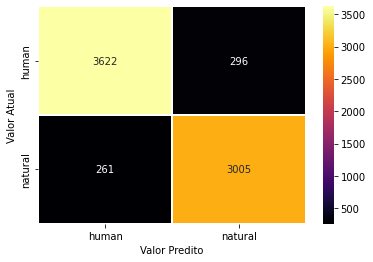

In [ ]:
tree_confusion_matrix = pd.crosstab(le_tree.inverse_transform(y_test), le_tree.inverse_transform(y_predicted_tree), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(tree_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

#### Funções de avaliação para a Árvore de Decisão

In [ ]:
evaluate(decisionTree, X_tree, y_tree, cv=cv)

Accuracy:     0.911 +/- 0.029
F1_micro:     0.911 +/- 0.029
Roc_auc:      0.956 +/- 0.031



Accuracy: 0.922466592427617
AUC: 0.9720416736609372


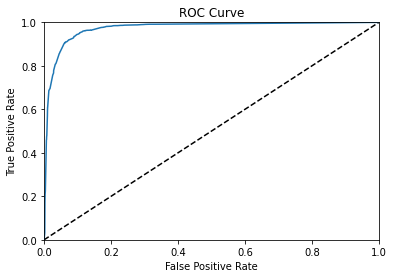

In [ ]:
roc_curve_function(X_test, y_test, y_predicted_tree, model_dt)

#### Features mais importantes segundo algoritmo da Árvore de Decisão

In [ ]:
# Features mais importantes
for feat in sorted(zip(df_features_names, decisionTree.feature_importances_), reverse=True, key=lambda x:x[1]):
  print(feat)

('fuel_type', 0.5557140828882152)
('seasons', 0.24876216832469472)
('fire_origin', 0.034683987118505434)
('fire_start_month', 0.03402451742313796)
('det_agent_type', 0.019852379732278914)
('fire_location_latitude', 0.01847545797337875)
('extinction_delta', 0.016655048683130502)
('control_time', 0.015740845927350897)
('weather_conditions_over_fire', 0.01325284764237778)
('fire_start_day', 0.00967792968337146)
('extinction_efficiency', 0.007353310395323477)
('initial_action_by', 0.0072116361920390335)
('fire_start_year', 0.00494145770991138)
('day_period', 0.003449198173859898)
('extinction_time', 0.002948430998361691)
('fire_location_longitude', 0.002710592001891612)
('fire_position_on_slope', 0.0022148218858424307)
('forest_protection_area', 0.001107167718245088)
('assessment_hectares', 0.0006019664859843819)
('uc_hectares', 0.0004645330889897286)
('fire_type', 0.00015761995310946858)
('current_size', 0.0)
('size_class', 0.0)
('bh_hectares', 0.0)
('ex_hectares', 0.0)


In [ ]:
dict_feat_importance_decision_tree = {'features':df_features_names, 'feature_importances_decision_tree':decisionTree.feature_importances_}

df_feat_importance_decision_tree = pd.DataFrame(dict_feat_importance_decision_tree)
df_feat_importance_decision_tree.sort_values(by=['feature_importances_decision_tree'], ascending=False, inplace=True)
df_feat_importance_decision_tree.reset_index(inplace=True, drop=True)
df_feat_importance_decision_tree

,features,feature_importances_decision_tree
0,fuel_type,0.555714
1,seasons,0.248762
2,fire_origin,0.034684
3,fire_start_month,0.034025
4,det_agent_type,0.019852
5,fire_location_latitude,0.018475
6,extinction_delta,0.016655
7,control_time,0.015741
8,weather_conditions_over_fire,0.013253
9,fire_start_day,0.009678


In [ ]:
# df_feat_importance_decision_tree.to_csv('df_feat_importances_decision_tree.csv')

### Random Forest

In [ ]:
# Instanciando o modelo
rfc = RandomForestClassifier(random_state=seed)

# definição dos parâmetros para a árvore de decisão
param_distributions = { 
                        'n_estimators': [10,11,12,15,17,18,19,20,22,24,26,28,30],
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [10,12,14,15,16,17,18,19,20,21,22],
                        'min_samples_split': [7,8,9,10,12,13,14,15,16,17,18],
                        'min_samples_leaf': [6,7,8,9,10,12,15,18],
                        'max_features':['auto', 'sqrt', 'log2']
                      }

# define random search for decision tree
rnd_search_rfc = RandomizedSearchCV(  estimator=rfc, 
                                      param_distributions = param_distributions, 
                                      n_iter=25, scoring='accuracy', 
                                      n_jobs=-1, cv=cv, random_state=seed
                                    )
# execute search
result_rfc = rnd_search_rfc.fit(X_train, y_train)

In [ ]:
# summarize result for random forest
print('=========Random Search Results for RandomForest==========')
print('Best Score: %s' % result_rfc.best_score_)
print('Best Hyperparameters: %s' % result_rfc.best_params_)

# Instanciando e avaliando o modelo
RFC = RandomForestClassifier(**result_rfc.best_params_, random_state=seed)

model_rfc = RFC.fit(X_train, y_train)
y_predicted_rfc = RFC.predict(X_test)

print('\nDesempenho médio do RandomForest:')

cv_results = model_selection.cross_val_score(RFC, X_train, y_train, cv=cv, scoring='accuracy')

name = 'RandomForest'
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

print("\nAcuracia do Random Forest: Treinamento",  RFC.score(X_train, y_train)," Teste", RFC.score(X_test, y_test))
print("\nClassification report:\n", classification_report(le_tree.inverse_transform(y_test), le_tree.inverse_transform(y_predicted_rfc)))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted_rfc))

=========Random Search Results for RandomForest==========
Best Score: 0.9360062862596324
Best Hyperparameters: {'n_estimators': 26, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'entropy'}

Desempenho médio do RandomForest:
RandomForest: 0.936006 (0.002512)

Acuracia do Random Forest: Treinamento 0.9595340851083577  Teste 0.9416759465478842

Classification report:
               precision    recall  f1-score   support

       human       0.95      0.94      0.95      3918
     natural       0.93      0.94      0.94      3266

    accuracy                           0.94      7184
   macro avg       0.94      0.94      0.94      7184
weighted avg       0.94      0.94      0.94      7184

Confusion matrix:
 [[3699  219]
 [ 200 3066]]


#### Representação Gráfica da Matrix de Confusão do Random Forest

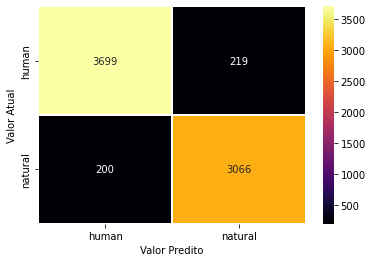

In [ ]:
rnd_frt_confusion_matrix = pd.crosstab(le_tree.inverse_transform(y_test), le_tree.inverse_transform(y_predicted_rfc), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(rnd_frt_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

#### Funções de avaliação para o Random Forest

In [ ]:
evaluate(RFC, X_tree, y_tree, cv=cv)

Accuracy:     0.925 +/- 0.025
F1_micro:     0.925 +/- 0.025
Roc_auc:      0.978 +/- 0.008



Accuracy: 0.9416759465478842
AUC: 0.9825755138952319


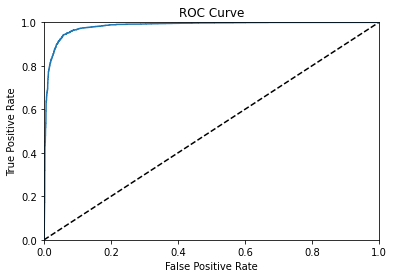

In [ ]:
roc_curve_function(X_test, y_test, y_predicted_rfc, model_rfc)

#### Features mais importantes segundo algoritmo Random Forest

In [ ]:
# Features mais importantes
for feat in sorted(zip(df_features_names, RFC.feature_importances_), reverse=True, key=lambda x:x[1]):
  print(feat)

('fuel_type', 0.27074371384205864)
('seasons', 0.16590935831054032)
('fire_origin', 0.14038258874451165)
('fire_start_month', 0.0769671742874027)
('fire_location_latitude', 0.05339784795816045)
('initial_action_by', 0.045184720700076474)
('det_agent_type', 0.035796931201564464)
('weather_conditions_over_fire', 0.03539982696769712)
('control_time', 0.027267815399884515)
('extinction_delta', 0.021491104461561016)
('fire_location_longitude', 0.016299708764551175)
('extinction_efficiency', 0.016020850177991024)
('fire_start_day', 0.015866052937867827)
('fire_start_year', 0.014201663394408943)
('extinction_time', 0.01342709187722432)
('forest_protection_area', 0.011024800952788022)
('day_period', 0.0068300568966496306)
('ex_hectares', 0.00665900829535797)
('uc_hectares', 0.006270106133215212)
('current_size', 0.00518927265313853)
('bh_hectares', 0.005121954006757641)
('assessment_hectares', 0.004346636608257374)
('fire_type', 0.0030803363627532744)
('fire_position_on_slope', 0.0024177386489

In [ ]:
dict_feat_importance_RFC = {'features':df_features_names, 'feature_importances_RFC':RFC.feature_importances_}

df_feat_importance_RFC = pd.DataFrame(dict_feat_importance_RFC)
df_feat_importance_RFC.sort_values(by=['feature_importances_RFC'], ascending=False, inplace=True)
df_feat_importance_RFC.reset_index(inplace=True, drop=True)
df_feat_importance_RFC

,features,feature_importances_RFC
0,fuel_type,0.270744
1,seasons,0.165909
2,fire_origin,0.140383
3,fire_start_month,0.076967
4,fire_location_latitude,0.053398
5,initial_action_by,0.045185
6,det_agent_type,0.035797
7,weather_conditions_over_fire,0.035400
8,control_time,0.027268
9,extinction_delta,0.021491


In [ ]:
# df_feat_importance_RFC.to_csv('df_feat_importances_RFC.csv')

### XGBoost

In [ ]:
#!pip install xgboost==1.2.0

In [ ]:
import xgboost
from xgboost import XGBClassifier

In [ ]:
xgboost.__version__

'0.90'

In [ ]:
# Divisao da base de dados em treinamento, validacao e teste
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_tree, y_tree, test_size=0.25, stratify=y_tree, random_state=seed)

In [ ]:
xgb = XGBClassifier(
                    booster='gbtree',
                    objective='binary:logistic', max_depth=15,
                    learning_rate=0.1, n_estimators=100,
                    random_state=seed, n_jobs=-1, tree_method='gpu_hist', gpu_id=0
)

* Obs1.: n_estimators=100: Popular among ensemble methods, `n_estimators` is the number of boosted trees in the model. Increasing this number while decreasing learning_rate can lead to more robust results.

#### Avaliação do Modelo antes da busca de hiperparâmetros - XGBoost

In [ ]:
# Avaliação do modelo antes da busca de parâmetros
evaluate(xgb, X_tree, y_tree, cv=cv)

Accuracy:     0.897 +/- 0.059
F1_micro:     0.897 +/- 0.059
Roc_auc:      0.964 +/- 0.030



In [ ]:
model = xgb.fit(X_train_xgb, y_train_xgb)
y_predicted = xgb.predict(X_test_xgb)

print("\nClassification report:\n", classification_report(le_tree.inverse_transform(y_test_xgb), le_tree.inverse_transform(y_predicted)))
print("Confusion matrix:\n", confusion_matrix(y_test_xgb, y_predicted))


Classification report:
               precision    recall  f1-score   support

       human       0.96      0.95      0.95      3918
     natural       0.94      0.95      0.94      3266

    accuracy                           0.95      7184
   macro avg       0.95      0.95      0.95      7184
weighted avg       0.95      0.95      0.95      7184

Confusion matrix:
 [[3706  212]
 [ 171 3095]]


#### Busca dos melhores hiperparâmetros - XGBoost

In [ ]:
PARAM_DISTRIBUTIONS = [
    {
      'n_estimators': [75, 85, 100, 125, 150, 175, 200, 225],
      'learning_rate':[0.01, 0.1, 0.2, 0.3],
      'max_depth':[5, 6, 7, 8, 9, 10, 12, 14],
      'booster':['gbtree', 'gblinear'],
      'objective':['binary:logistic','binary:logitraw'],
      'gamma':[0, 0.1, 0.5, 1.0, 1.5],
      'min_child_weight':[1, 2, 3, 4, 5],
      'subsample':[0.5, 0.7, 0.8, 0.9, 1],
      'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],
      'colsample_bynode':[0.5, 0.7, 0.8, 0.9, 1],
      'colsample_bylevel':[0.5, 0.7, 0.8, 0.9, 1]
    }
  ]

In [ ]:
rnd_search = RandomizedSearchCV(estimator=xgb, 
                                param_distributions = PARAM_DISTRIBUTIONS, 
                                n_iter=25, scoring= 'accuracy',
                                n_jobs=-1, cv=cv, random_state=seed
                              )
rnd_search.fit(X_train_xgb, y_train_xgb)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(gpu_id=0, max_depth=15, n_jobs=-1,
                                           random_state=1275,
                                           tree_method='gpu_hist'),
                   n_iter=25, n_jobs=-1,
                   param_distributions=[{'booster': ['gbtree', 'gblinear'],
                                         'colsample_bylevel': [0.5, 0.7, 0.8,
                                                               0.9, 1],
                                         'colsample_bynode': [0.5, 0.7, 0.8,
                                                              0.9, 1],
                                         'colsample_bytree': [0.5, 0.7, 0.8,
                                                              0.9, 1],
                                         'gamma': [0, 0.1, 0.5, 1.0, 1.5],
                                         'learning_rate': [0.01, 0.1

#### Avaliação do Modelo com os melhores hiperparâmetros - XGBoost

In [ ]:
rnd_search.best_params_

{'booster': 'gbtree',
 'colsample_bylevel': 0.7,
 'colsample_bynode': 0.7,
 'colsample_bytree': 0.7,
 'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 150,
 'objective': 'binary:logistic',
 'subsample': 0.8}

In [ ]:
hyper_xgb = XGBClassifier(**rnd_search.best_params_, random_state=seed)
print(hyper_xgb.get_params)
print('\n')

evaluate(hyper_xgb, X_tree, y_tree, cv=cv)

<bound method XGBModel.get_params of XGBClassifier(colsample_bylevel=0.7, colsample_bynode=0.7, colsample_bytree=0.7,
              gamma=1.5, max_depth=8, min_child_weight=3, n_estimators=150,
              random_state=1275, subsample=0.8)>


Accuracy:     0.865 +/- 0.092
F1_micro:     0.865 +/- 0.092
Roc_auc:      0.948 +/- 0.053



In [ ]:
model_hyper = hyper_xgb.fit(X_train_xgb, y_train_xgb)
y_predicted_h = hyper_xgb.predict(X_test_xgb)

print("\nClassification report:\n", classification_report(le_tree.inverse_transform(y_test_xgb), le_tree.inverse_transform(y_predicted_h)))
print("Confusion matrix:\n", confusion_matrix(y_test_xgb, y_predicted_h))


Classification report:
               precision    recall  f1-score   support

       human       0.96      0.95      0.95      3918
     natural       0.94      0.95      0.95      3266

    accuracy                           0.95      7184
   macro avg       0.95      0.95      0.95      7184
weighted avg       0.95      0.95      0.95      7184

Confusion matrix:
 [[3727  191]
 [ 169 3097]]


Accuracy: 0.9498886414253898
AUC: 0.9885018100703116


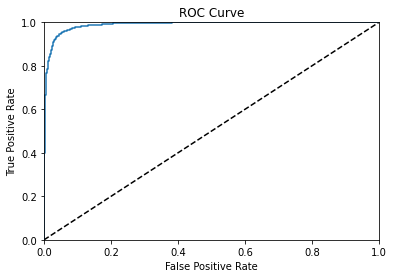

In [ ]:
roc_curve_function(X_test_xgb, y_test_xgb, y_predicted_h, model_hyper)

## Redes Neurais - MLP

In [ ]:
#!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.6 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa

In [ ]:
print("Tensorflow Version: ", tf.__version__)
print("GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Tensorflow Adons Version: ", tfa.__version__)

Tensorflow Version:  2.8.2
GPUs Available:  1
Tensorflow Adons Version:  0.17.1


In [ ]:
# Aplicando o processamento de dados
le_mlp = LabelEncoder()

y_processed = le_mlp.fit_transform(y)

In [ ]:
X_gdm = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X_gdm.shape

(28733, 98)

In [ ]:
X_gdm.head()

,assessment_hectares,current_size,fire_location_latitude,fire_location_longitude,bh_hectares,uc_hectares,ex_hectares,fire_start_day,fire_start_month,fire_start_year,...,seasons_winter,forest_protection_area_Edson,forest_protection_area_Fort McMurray,forest_protection_area_Grande Prairie,forest_protection_area_High Level,forest_protection_area_Lac La Biche,forest_protection_area_Peace River,forest_protection_area_Rocky,forest_protection_area_Slave Lake,forest_protection_area_Whitecourt
0,1.00,1.0,56.6914,-111.3831,1.0,1.0,1.0,4,5,1996,...,0,0,0,0,0,0,0,0,0,0
1,0.40,0.4,57.2789,-111.5762,0.4,0.4,0.4,19,5,1996,...,0,0,0,0,0,0,0,0,0,0
2,1.00,4.0,58.2523,-110.5540,4.0,4.0,4.0,24,5,1996,...,0,0,0,0,0,0,0,0,0,0
3,0.02,1.2,57.7477,-112.6786,1.2,1.2,1.2,29,5,1996,...,0,0,0,0,0,0,0,0,0,0
4,0.04,1.6,57.5501,-111.2103,0.8,0.8,1.6,30,5,1996,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_gdm, y_processed, test_size=0.25, stratify=y_processed, random_state=seed)
X_train_mlp, X_valid_mlp, y_train_mlp, y_valid_mlp = train_test_split(X_train_mlp, y_train_mlp, test_size = 0.3333, stratify=y_train_mlp, random_state=seed)

print('Shape do Conjunto de Treino: ', X_train_mlp.shape)
print('Shape das labels de Treino: ', y_train_mlp.shape)
print('Shape do Conjunto de Validação: ', X_valid_mlp.shape)
print('Shape das labels de Validação: ', y_valid_mlp.shape)
print('Shape do Conjunto de Teste: ', X_test_mlp.shape)
print('Shape das labels de Teste: ', y_test_mlp.shape)

Shape do Conjunto de Treino:  (14366, 98)
Shape das labels de Treino:  (14366,)
Shape do Conjunto de Validação:  (7183, 98)
Shape das labels de Validação:  (7183,)
Shape do Conjunto de Teste:  (7184, 98)
Shape das labels de Teste:  (7184,)


In [ ]:
print("y train:", np.bincount(y_train_mlp))
print("y valid:", np.bincount(y_valid_mlp))
print("y test:", np.bincount(y_test_mlp))

y train: [7835 6531]
y valid: [3917 3266]
y test: [3918 3266]


In [ ]:
Scaler = MinMaxScaler(feature_range=(-1,1))
Scaler.fit(X_train_mlp[num_cols])

MinMaxScaler(feature_range=(-1, 1))

In [ ]:
X_train_mlp.loc[:,num_cols] = Scaler.transform(X_train_mlp[num_cols])
X_valid_mlp.loc[:,num_cols] = Scaler.transform(X_valid_mlp[num_cols])
X_test_mlp.loc[:,num_cols] = Scaler.transform(X_test_mlp[num_cols])

* Definindo o modelo (MLP)

In [ ]:
INPUT_SHAPE = (X_train_mlp.shape[1],)
DROPOUT = 0.3

model_mlp = keras.models.Sequential([
                                      keras.layers.Dense(100, activation='relu', input_shape=INPUT_SHAPE),
                                      keras.layers.Dropout(DROPOUT),
                                      keras.layers.Dense(50, activation='relu'),
                                      keras.layers.Dropout(DROPOUT),
                                      keras.layers.Dense(10, activation='relu'),
                                      keras.layers.Dropout(DROPOUT),
                                      keras.layers.Dense(1, activation = "sigmoid")
])

model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               9900      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

* Definindo função de perda, otimizador e métricas;
* Compilando o modelo.

In [ ]:
from tensorflow_addons.metrics.f_scores import F1Score

f1_score = F1Score(num_classes=2, average="micro", threshold=0.5)

model_mlp.compile(loss='binary_crossentropy', optimizer="Adam", metrics= ['accuracy', keras.metrics.AUC(name='auc'), f1_score])

* Definindo tamanho dos lotes (*batch size*) e o número de épocas.

In [ ]:
BATCH_SIZE = 50    # Tamanho do batch de treinamento
N_EPOCHS = 100

* Treinando o Modelo.

In [ ]:
callback_mlp = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7) 
# This callback will stop the training when there is no improvement in the loss for five consecutive epochs.

history_mlp = model_mlp.fit(
                            x=X_train_mlp, 
                            y=y_train_mlp, 
                            epochs=N_EPOCHS, 
                            batch_size=BATCH_SIZE, 
                            verbose='auto', 
                            validation_data=(X_valid_mlp,y_valid_mlp),
                            callbacks=[callback_mlp],
                          )
print('\nQuantidade de épocas executadas: ', len(history_mlp.history['loss']))

Epoch 1/100
288/288 [==============================] - 8s 12ms/step - loss: 0.3281 - accuracy: 0.8666 - auc: 0.9374 - f1_score: 0.8550 - val_loss: 0.1951 - val_accuracy: 0.9257 - val_auc: 0.9761 - val_f1_score: 0.9185
Epoch 2/100
288/288 [==============================] - 3s 9ms/step - loss: 0.2245 - accuracy: 0.9210 - auc: 0.9681 - f1_score: 0.9133 - val_loss: 0.1873 - val_accuracy: 0.9284 - val_auc: 0.9782 - val_f1_score: 0.9207
Epoch 3/100
288/288 [==============================] - 3s 12ms/step - loss: 0.2124 - accuracy: 0.9245 - auc: 0.9718 - f1_score: 0.9171 - val_loss: 0.1815 - val_accuracy: 0.9293 - val_auc: 0.9790 - val_f1_score: 0.9221
Epoch 4/100
288/288 [==============================] - 4s 13ms/step - loss: 0.2071 - accuracy: 0.9286 - auc: 0.9731 - f1_score: 0.9218 - val_loss: 0.1911 - val_accuracy: 0.9272 - val_auc: 0.9792 - val_f1_score: 0.9174
Epoch 5/100
288/288 [==============================] - 3s 11ms/step - loss: 0.1981 - accuracy: 0.9303 - auc: 0.9754 - f1_score: 0

* Plotando o histórico das métricas `accuracy` e `f1-score`.

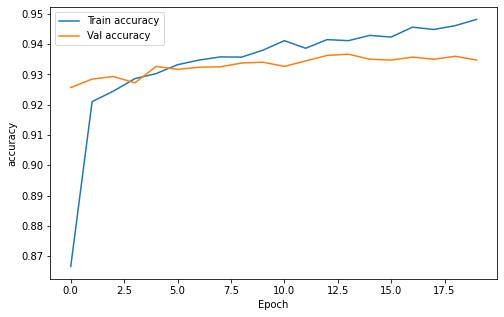

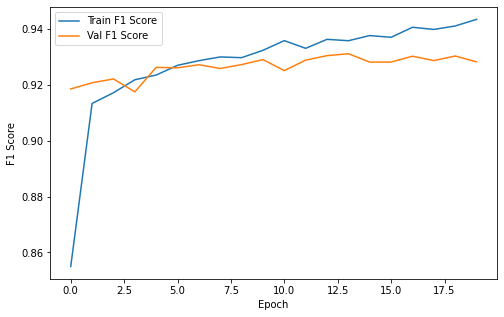

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,5))
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
           label='Train accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val accuracy')
  # plt.ylim([0,5])
  plt.legend()

  plt.figure(figsize=(8,5))
  plt.xlabel('Epoch')
  plt.ylabel('F1 Score')
  plt.plot(hist['epoch'], hist['f1_score'],
           label='Train F1 Score')
  plt.plot(hist['epoch'], hist['val_f1_score'],
           label = 'Val F1 Score')
  # plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history_mlp)

### Predição e Métricas de Avaliação - MLP

* Avaliando o modelo treinado e exibindo as métricas obtidas a partir do conjunto de testes.

In [ ]:
loss, acc, auc, f1 = model_mlp.evaluate(X_test_mlp, y_test_mlp, batch_size=BATCH_SIZE, verbose='auto')

print("F1 Score: {:5.3f}".format(f1))
print("Accuracy: {:5.3f}".format(acc))
print("AUC: {:5.3f}".format(auc))

F1 Score: 0.933
Accuracy: 0.939
AUC: 0.981


In [ ]:
y_predicted_mlp = np.reshape((model_mlp.predict(X_test_mlp) > 0.5).astype('int8'), len(X_test_mlp))
print(y_predicted_mlp)

[1 1 0 ... 1 1 1]


In [ ]:
print("\nClassification report:\n", classification_report(le_mlp.inverse_transform(y_test_mlp), le_mlp.inverse_transform(y_predicted_mlp)))
print("Confusion matrix:\n", confusion_matrix(y_test_mlp, y_predicted_mlp))


Classification report:
               precision    recall  f1-score   support

       human       0.94      0.95      0.94      3918
     natural       0.94      0.93      0.93      3266

    accuracy                           0.94      7184
   macro avg       0.94      0.94      0.94      7184
weighted avg       0.94      0.94      0.94      7184

Confusion matrix:
 [[3712  206]
 [ 231 3035]]


#### Representação Gráfica da Matrix de Confusão da Rede Neural MLP

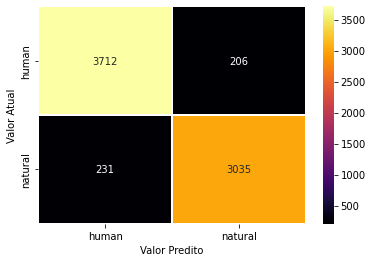

In [ ]:
# Matriz de confusão com heatmap
mlp_confusion_matrix = pd.crosstab(np.reshape(le_mlp.inverse_transform(y_test_mlp), len(y_test_mlp)), np.reshape(le_mlp.inverse_transform(y_predicted_mlp), len(y_predicted_mlp)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(mlp_confusion_matrix, annot=True, fmt="d", cmap='inferno', linewidths=.5)
plt.show()

#### Curva ROC e AUC para a Rede Neural MLP

Accuracy: 0.9391703786191536
AUC: 0.9817193214104075


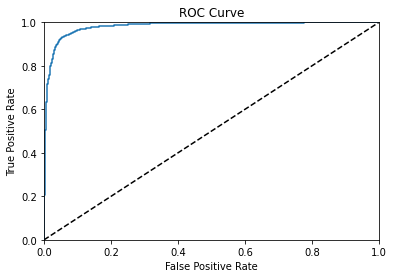

In [ ]:
roc_curve_function(X_test_mlp, y_test_mlp, y_predicted_mlp, model_mlp, rn=True)

### Ajuste dos Hiperparâmetros com keras tuner - Rede Neural MLP

In [ ]:
#!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 30.2 MB/s 


In [ ]:
import keras_tuner as kt

In [ ]:
from tensorflow_addons.metrics.f_scores import F1Score
METRICS_F1 = F1Score(num_classes=2, average="micro", threshold=0.5)

def model_mlp_builder(hp):
  # Hiperparameters
  INPUT_SHAPE = (X_train_mlp.shape[1],)

  DROPOUT = 0.3
  HP_HIDDEN_LAYER_1_UNITS = hp.Int('units_1', min_value=50, max_value=150, step=10)
  HP_HIDDEN_LAYER_2_UNITS = hp.Int('units_2', min_value=30, max_value=80, step=10)
  HP_HIDDEN_LAYER_3_UNITS = hp.Int('units_3', min_value=5, max_value=30, step=5)

  model_mlp_tn = keras.models.Sequential([
                                          keras.layers.Dense(units=HP_HIDDEN_LAYER_1_UNITS, activation='relu', input_shape=INPUT_SHAPE),
                                          keras.layers.Dropout(DROPOUT),
                                          keras.layers.Dense(units=HP_HIDDEN_LAYER_2_UNITS, activation='relu'),
                                          keras.layers.Dropout(DROPOUT),
                                          keras.layers.Dense(units=HP_HIDDEN_LAYER_3_UNITS, activation='relu'),
                                          keras.layers.Dropout(DROPOUT),
                                          keras.layers.Dense(1, activation = "sigmoid")
  ])
    
  HP_LEARNING_RATE = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model_mlp_tn.compile(
      loss="binary_crossentropy", 
      optimizer=keras.optimizers.Adam(learning_rate=HP_LEARNING_RATE), 
      metrics=['accuracy', keras.metrics.AUC(name='auc'), METRICS_F1]
  )

  return model_mlp_tn

In [ ]:
MAX_EPOCHS = 100

tuner_mlp = kt.Hyperband(
                          model_mlp_builder,
                          objective= kt.Objective('val_loss', direction='min'),
                          max_epochs=MAX_EPOCHS,
                          factor=3,
                          directory='mlp_tuner_dir_1',
                          project_name='mlp_tuner_val_loss'
                        )
#tuner_mlp.search_space_summary()

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

BATCH_SIZE = 50    # Tamanho do batch de treinamento
N_EPOCHS = 100

tuner_mlp.search(
                  x=X_train_mlp, 
                  y=y_train_mlp, 
                  epochs=N_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  #verbose='auto', 
                  validation_data=(X_valid_mlp,y_valid_mlp),
                  callbacks=[stop_early],
                )

Trial 254 Complete [00h 02m 39s]
val_loss: 0.173521026968956

Best val_loss So Far: 0.1702076643705368
Total elapsed time: 01h 08m 29s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_mlp.get_best_hyperparameters(num_trials=1)[0]

for h_param in ['units_1', 'units_2', 'units_3'] + ['learning_rate']:
  print(h_param, best_hps.get(h_param))

units_1 130
units_2 60
units_3 20
learning_rate 0.001


In [ ]:
# Encontre o número ótimo de épocas para treinar o modelo com os hiperparâmetros obtidos na busca

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_mlp_tn = tuner_mlp.hypermodel.build(best_hps)

history_mlp_tn = model_mlp_tn.fit(
                                    x=X_train_mlp, 
                                    y=y_train_mlp, 
                                    epochs=50, 
                                    batch_size=BATCH_SIZE, 
                                    verbose='auto',
                                    validation_data=(X_valid_mlp,y_valid_mlp)
                                  )

val_loss_per_epoch = history_mlp_tn.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
288/288 [==============================] - 3s 8ms/step - loss: 0.2949 - accuracy: 0.8789 - auc: 0.9480 - f1_score: 0.8872 - val_loss: 0.1916 - val_accuracy: 0.9262 - val_auc: 0.9772 - val_f1_score: 0.9199
Epoch 2/50
288/288 [==============================] - 2s 6ms/step - loss: 0.2113 - accuracy: 0.9242 - auc: 0.9713 - f1_score: 0.9171 - val_loss: 0.1856 - val_accuracy: 0.9265 - val_auc: 0.9787 - val_f1_score: 0.9190
Epoch 3/50
288/288 [==============================] - 2s 7ms/step - loss: 0.2016 - accuracy: 0.9272 - auc: 0.9738 - f1_score: 0.9204 - val_loss: 0.1802 - val_accuracy: 0.9294 - val_auc: 0.9796 - val_f1_score: 0.9231
Epoch 4/50
288/288 [==============================] - 2s 7ms/step - loss: 0.1890 - accuracy: 0.9321 - auc: 0.9771 - f1_score: 0.9258 - val_loss: 0.1773 - val_accuracy: 0.9312 - val_auc: 0.9801 - val_f1_score: 0.9245
Epoch 5/50
288/288 [==============================] - 3s 9ms/step - loss: 0.1850 - accuracy: 0.9333 - auc: 0.9779 - f1_score: 0.9273 - v

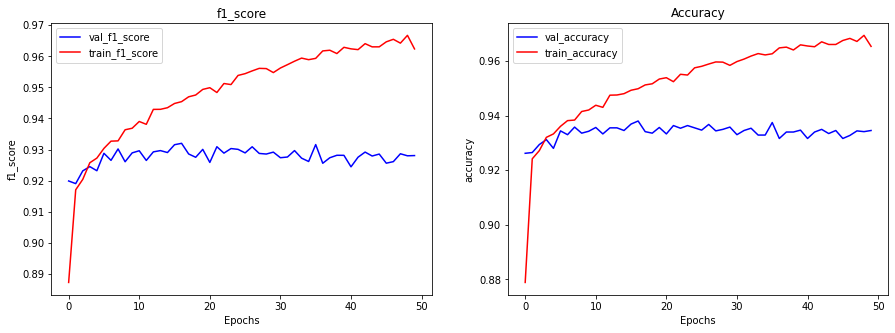

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mlp_tn.history['val_f1_score'], color='blue', label='val_f1_score')
plt.plot(history_mlp_tn.history['f1_score'], color='red', label='train_f1_score')
plt.title('f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
#plt.ylim(None, 1)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_mlp_tn.history['val_accuracy'], color='blue', label='val_accuracy')
plt.plot(history_mlp_tn.history['accuracy'], color='red', label='train_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.ylim(0, None);
plt.legend();

In [ ]:
hypermodel_mlp = tuner_mlp.hypermodel.build(best_hps)

# Retrain the model
hypermodel_mlp.fit(
                    x=X_train_mlp, 
                    y=y_train_mlp,  
                    epochs=best_epoch,
                    batch_size=BATCH_SIZE, 
                    verbose='auto',
                    validation_data=(X_valid_mlp,y_valid_mlp)
                  )

Epoch 1/8
288/288 [==============================] - 3s 8ms/step - loss: 0.3071 - accuracy: 0.8724 - auc: 0.9439 - f1_score: 0.8816 - val_loss: 0.1970 - val_accuracy: 0.9264 - val_auc: 0.9763 - val_f1_score: 0.9182
Epoch 2/8
288/288 [==============================] - 2s 6ms/step - loss: 0.2122 - accuracy: 0.9259 - auc: 0.9713 - f1_score: 0.9191 - val_loss: 0.1881 - val_accuracy: 0.9287 - val_auc: 0.9782 - val_f1_score: 0.9235
Epoch 3/8
288/288 [==============================] - 2s 5ms/step - loss: 0.2016 - accuracy: 0.9289 - auc: 0.9737 - f1_score: 0.9228 - val_loss: 0.1819 - val_accuracy: 0.9332 - val_auc: 0.9792 - val_f1_score: 0.9273
Epoch 4/8
288/288 [==============================] - 2s 7ms/step - loss: 0.1904 - accuracy: 0.9316 - auc: 0.9767 - f1_score: 0.9254 - val_loss: 0.1781 - val_accuracy: 0.9312 - val_auc: 0.9798 - val_f1_score: 0.9249
Epoch 5/8
288/288 [==============================] - 2s 8ms/step - loss: 0.1853 - accuracy: 0.9315 - auc: 0.9777 - f1_score: 0.9254 - val_lo

In [ ]:
loss_hp, acc_hp, auc_hp, f1_hp = hypermodel_mlp.evaluate(X_test_mlp, y_test_mlp, batch_size=BATCH_SIZE, verbose='auto')

print("F1 Score: {:5.3f}".format(f1_hp))
print("Accuracy: {:5.3f}".format(acc_hp))
print("AUC: {:5.3f}".format(auc_hp))

F1 Score: 0.930
Accuracy: 0.935
AUC: 0.982


In [ ]:
y_predicted_hp_mlp = np.reshape((hypermodel_mlp.predict(X_test_mlp) > 0.5).astype('int8'), len(X_test_mlp))

print("\nClasification report:\n", classification_report(le_mlp.inverse_transform(y_test_mlp), le_mlp.inverse_transform(y_predicted_hp_mlp)))
print("Confusion matrix:\n", confusion_matrix(y_test_mlp, y_predicted_hp_mlp))


Clasification report:
               precision    recall  f1-score   support

       human       0.95      0.93      0.94      3918
     natural       0.92      0.94      0.93      3266

    accuracy                           0.94      7184
   macro avg       0.93      0.94      0.94      7184
weighted avg       0.94      0.94      0.94      7184

Confusion matrix:
 [[3635  283]
 [ 181 3085]]


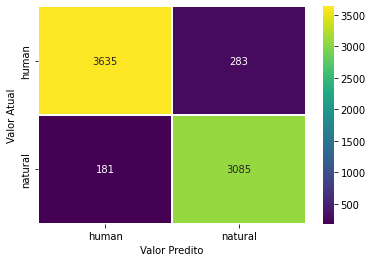

In [ ]:
mlp_hp_confusion_matrix = pd.crosstab(np.reshape(le_mlp.inverse_transform(y_test_mlp), len(y_test_mlp)), np.reshape(le_mlp.inverse_transform(y_predicted_hp_mlp), len(y_predicted_hp_mlp)), rownames=['Valor Atual'], colnames=['Valor Predito'])

sn.heatmap(mlp_hp_confusion_matrix, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.show()

Accuracy: 0.9354120267260579
AUC: 0.9817997750580094


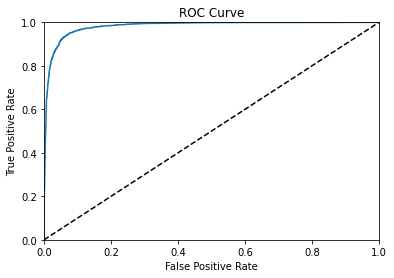

In [ ]:
roc_curve_function(X_test_mlp, y_test_mlp, y_predicted_hp_mlp, hypermodel_mlp, rn=True)

### Validação Cruzada - Rede Neural

In [ ]:
# K-fold estratificado com k = 10
cv = model_selection.StratifiedKFold(n_splits=10)

In [ ]:
inputs = np.concatenate((X_train_mlp, X_valid_mlp, X_test_mlp), axis=0)
targets = np.concatenate((y_train_mlp, y_valid_mlp, y_test_mlp), axis=0)

BATCH_SIZE = 50    # Tamanho do batch de treinamento
N_EPOCHS = 100

fold_no = 1
loss_per_fold = []
acc_per_fold = []
auc_per_fold = []
f1_per_fold = []

for train_index, test_index in cv.split(inputs, targets):
  INPUT_SHAPE = (X_train_mlp.shape[1],)
  DROPOUT = 0.3

  model_cv = keras.models.Sequential([
                                        keras.layers.Dense(100, activation='relu', input_shape=INPUT_SHAPE),
                                        keras.layers.Dropout(DROPOUT),
                                        keras.layers.Dense(50, activation='relu'),
                                        keras.layers.Dropout(DROPOUT),
                                        keras.layers.Dense(10, activation='relu'),
                                        keras.layers.Dropout(DROPOUT),
                                        keras.layers.Dense(1, activation = "sigmoid")
  ])

  f1_score = F1Score(num_classes=2, average="micro", threshold=0.5)

  model_cv.compile(loss='binary_crossentropy', optimizer="Adam", metrics= ['accuracy', keras.metrics.AUC(name='auc'), f1_score])

  callback_cv = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5) 
  # This callback will stop the training when there is no improvement in the loss for five consecutive epochs.

  history_cv = model_cv.fit(
                              x=inputs[train_index], 
                              y=targets[train_index], 
                              epochs=N_EPOCHS, 
                              batch_size=BATCH_SIZE, 
                              verbose='auto', 
                              # validation_data=(X_valid_mlp,y_valid_mlp),
                              callbacks=[callback_cv],
                            )
  # Generate metrics
  scores = model_cv.evaluate(inputs[test_index], targets[test_index], verbose=0)

  print(f'Score for fold {fold_no}: {model_cv.metrics_names[0]} of {scores[0]}; {model_cv.metrics_names[1]} of {scores[1]}; {model_cv.metrics_names[2]} of {scores[2]}; {model_cv.metrics_names[3]} of {scores[3]}')
  
  loss_per_fold.append(scores[0])
  acc_per_fold.append(scores[1])
  auc_per_fold.append(scores[2])
  f1_per_fold.append(scores[3])

  # Increase fold number
  fold_no = fold_no + 1

Epoch 1/100
518/518 [==============================] - 3s 4ms/step - loss: 0.2853 - accuracy: 0.8847 - auc: 0.9514 - f1_score: 0.8749
Epoch 2/100
518/518 [==============================] - 2s 4ms/step - loss: 0.2160 - accuracy: 0.9272 - auc: 0.9709 - f1_score: 0.9204
Epoch 3/100
518/518 [==============================] - 2s 4ms/step - loss: 0.2049 - accuracy: 0.9313 - auc: 0.9739 - f1_score: 0.9247
Epoch 4/100
518/518 [==============================] - 2s 4ms/step - loss: 0.1970 - accuracy: 0.9338 - auc: 0.9760 - f1_score: 0.9276
Epoch 5/100
518/518 [==============================] - 2s 4ms/step - loss: 0.1908 - accuracy: 0.9370 - auc: 0.9772 - f1_score: 0.9312
Epoch 6/100
518/518 [==============================] - 2s 4ms/step - loss: 0.1841 - accuracy: 0.9374 - auc: 0.9787 - f1_score: 0.9314
Epoch 7/100
518/518 [==============================] - 2s 4ms/step - loss: 0.1797 - accuracy: 0.9405 - auc: 0.9796 - f1_score: 0.9348
Epoch 8/100
518/518 [==============================] - 2s 4ms/

In [ ]:
# Print metrics
print(
        f"Accuracy:     {np.mean(acc_per_fold):.3f} +/- {np.std(acc_per_fold):.3f}\n"
        f"F1_score:     {np.mean(f1_per_fold):.3f} +/- {np.std(f1_per_fold):.3f}\n"
        f"Roc_auc:      {np.mean(auc_per_fold):.3f} +/- {np.std(auc_per_fold):.3f}\n"
)

Accuracy:     0.936 +/- 0.003
F1_score:     0.930 +/- 0.003
Roc_auc:      0.974 +/- 0.003



In [ ]:
# Print metrics for all folds
print(
      f"Accuracy per fold:     {acc_per_fold}\n"
      f"F1_score per fold:     {f1_per_fold}\n"
      f"Roc_auc per fold:      {auc_per_fold}\n"
)

Accuracy per fold:     [0.9335420727729797, 0.9349339008331299, 0.9380654096603394, 0.930734395980835, 0.9380438327789307, 0.9335189461708069, 0.9349112510681152, 0.9397841691970825, 0.939436137676239, 0.9363034963607788]
F1_score per fold:     [0.9269598722457886, 0.9280492067337036, 0.9327794909477234, 0.9254401922225952, 0.9324734210968018, 0.9269598722457886, 0.9289243817329407, 0.9339946508407593, 0.9334353804588318, 0.9306555986404419]
Roc_auc per fold:      [0.9742457270622253, 0.972420871257782, 0.9675591588020325, 0.9754006862640381, 0.9762335419654846, 0.9753592014312744, 0.9734725952148438, 0.977726936340332, 0.9736078977584839, 0.9730005264282227]

